<a href="https://colab.research.google.com/github/HitanshSondhi/Uber-Data-Analytics/blob/main/Uber_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

Saving ncr_ride_bookings.csv to ncr_ride_bookings.csv


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
df=pd.read_csv('ncr_ride_bookings.csv')
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,3/23/2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/29/2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,8/23/2024,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,10/21/2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,9/16/2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.shape


(150000, 21)

In [ ]:
df.dtypes

,0
Date,object
Time,object
Booking ID,object
Booking Status,object
Customer ID,object
Vehicle Type,object
Pickup Location,object
Drop Location,object
Avg VTAT,float64
Avg CTAT,float64


# **Data Cleaning Process**

In [ ]:
missing_percentage=df.isnull().sum()*100/len(df)
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Date                                  0.0
Time                                  0.0
Booking ID                            0.0
Booking Status                        0.0
Customer ID                           0.0
Vehicle Type                          0.0
Pickup Location                       0.0
Drop Location                         0.0
Avg VTAT                              7.0
Avg CTAT                             32.0
Cancelled Rides by Customer          93.0
Reason for cancelling by Customer    93.0
Cancelled Rides by Driver            82.0
Driver Cancellation Reason           82.0
Incomplete Rides                     94.0
Incomplete Rides Reason              94.0
Booking Value                        32.0
Ride Distance                        32.0
Driver Ratings                       38.0
Customer Rating                      38.0
Payment Method                       32.0
dtype: float64


In [6]:
df.drop_duplicates(inplace=True)
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
df['is_completed'] = np.where(df['booking_status'].str.lower() == 'completed', 1, 0)
metrics_cols = ['avg_vtat', 'avg_ctat', 'booking_value', 'ride_distance',
                'driver_ratings', 'customer_rating']
df.loc[df['booking_status'].str.lower() != 'completed', metrics_cols] = 0
df['reason_for_cancelling_by_customer'] = df['reason_for_cancelling_by_customer'].fillna('Not applicable')
df['driver_cancellation_reason'] = df['driver_cancellation_reason'].fillna('Not applicable')
df['incomplete_rides_reason'] = df['incomplete_rides_reason'].fillna('Not applicable')


count_cols = ['cancelled_rides_by_customer', 'cancelled_rides_by_driver', 'incomplete_rides']
for col in count_cols:
    df[col] = df[col].fillna(0)
for col in metrics_cols:
    df.loc[df['booking_status'].str.lower() == 'completed', col] = (
        df[df['booking_status'].str.lower() == 'completed']
        .groupby('vehicle_type')[col]
        .transform(lambda x: x.fillna(x.median()))
    )

df.loc[df['booking_status'].str.lower() != 'completed', 'payment_method'] = 'Not applicable'

payment_mode = df[df['booking_status'].str.lower() == 'completed']['payment_method'].mode()[0]
df['payment_method'] = df.groupby('vehicle_type')['payment_method'].transform(
    lambda x: x.fillna(payment_mode)
)
for vt in df['vehicle_type'].unique():
    q1 = df.loc[df['vehicle_type']==vt, 'booking_value'].quantile(0.25)
    q3 = df.loc[df['vehicle_type']==vt, 'booking_value'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = df['vehicle_type'] == vt
    df.loc[mask & (df['booking_value'] < lower), 'booking_value'] = lower
    df.loc[mask & (df['booking_value'] > upper), 'booking_value'] = upper

missing_percentage=df.isnull().sum()*100/len(df)
print("Percentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
date                                 0.0
time                                 0.0
booking_id                           0.0
booking_status                       0.0
customer_id                          0.0
vehicle_type                         0.0
pickup_location                      0.0
drop_location                        0.0
avg_vtat                             0.0
avg_ctat                             0.0
cancelled_rides_by_customer          0.0
reason_for_cancelling_by_customer    0.0
cancelled_rides_by_driver            0.0
driver_cancellation_reason           0.0
incomplete_rides                     0.0
incomplete_rides_reason              0.0
booking_value                        0.0
ride_distance                        0.0
driver_ratings                       0.0
customer_rating                      0.0
payment_method                       0.0
is_completed                         0.0
dtype: float64


In [ ]:
df.to_csv('ncr_ride_bookings_cleaned.csv', index=False)


In [ ]:
df.head(10)

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,is_completed
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.6,30.1,...,0.0,Not cancelled,0.0,Completed,409.0,26.39,4.3,4.5,Not applicable,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,8.5,29.9,...,0.0,Not cancelled,1.0,Vehicle Breakdown,417.0,26.03,4.3,4.5,Not applicable,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,0.0,Not cancelled,0.0,Completed,627.0,13.58,4.9,4.9,Debit Card,1
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,0.0,Not cancelled,0.0,Completed,416.0,34.02,4.6,5.0,UPI,1
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,0.0,Not cancelled,0.0,Completed,692.5,48.21,4.1,4.3,UPI,1
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,0.0,Not cancelled,0.0,Completed,316.0,4.85,4.1,4.6,UPI,1
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,0.0,Not cancelled,0.0,Completed,640.0,41.24,4.0,4.1,UPI,1
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,0.0,Not cancelled,0.0,Completed,138.0,6.56,4.4,4.2,UPI,1
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,8.5,29.9,...,0.0,Not cancelled,0.0,Completed,417.0,26.03,4.3,4.5,Not applicable,0
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,8.5,30.0,...,0.0,Not cancelled,1.0,Other Issue,413.0,25.96,4.3,4.4,Not applicable,0


## **UNIVARIATE ANALYSIS**

In [ ]:
numerical_cols = ['avg_vtat', 'avg_ctat', 'booking_value', 'ride_distance', 'driver_ratings', 'customer_rating']
print("Statistical Summary of numerical columns")
print(df[numerical_cols].describe())

Statistical Summary of numerical columns
            avg_vtat       avg_ctat  booking_value  ride_distance  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        5.277365      18.621559     265.024733      16.120306   
std         5.077389      16.091320     263.869800      16.666106   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         4.500000      20.900000     194.000000      11.350000   
75%         9.800000      32.900000     485.000000      30.650000   
max        15.000000      45.000000     700.500000      50.000000   

       driver_ratings  customer_rating  
count   150000.000000    150000.000000  
mean         2.623215         2.730842  
std          2.082283         2.165548  
min          0.000000         0.000000  
25%          0.000000         0.000000  
50%          3.900000         4.100000  
75%          4.300000         4.600000  
max      

Visualisation of the numerical columns 


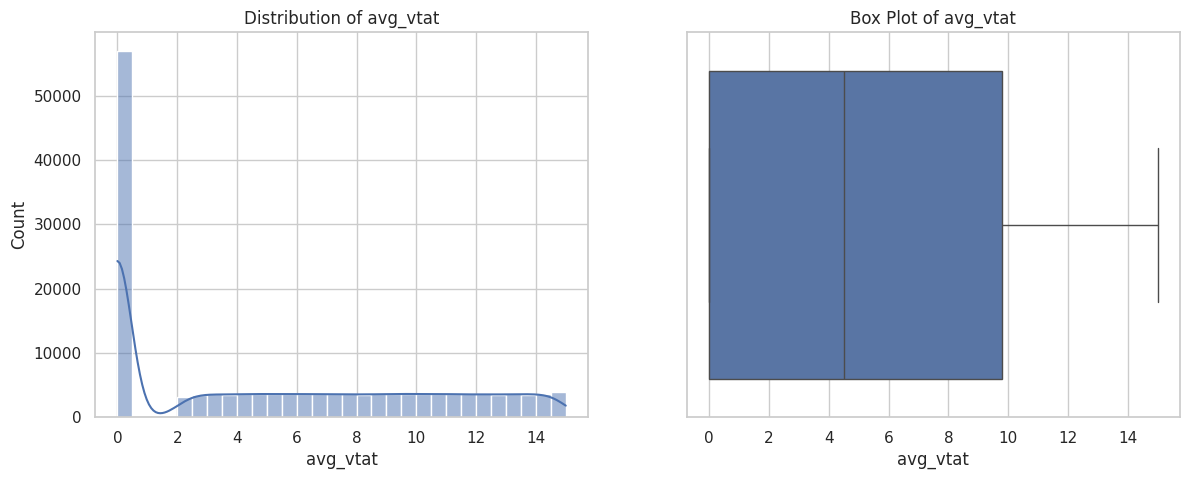

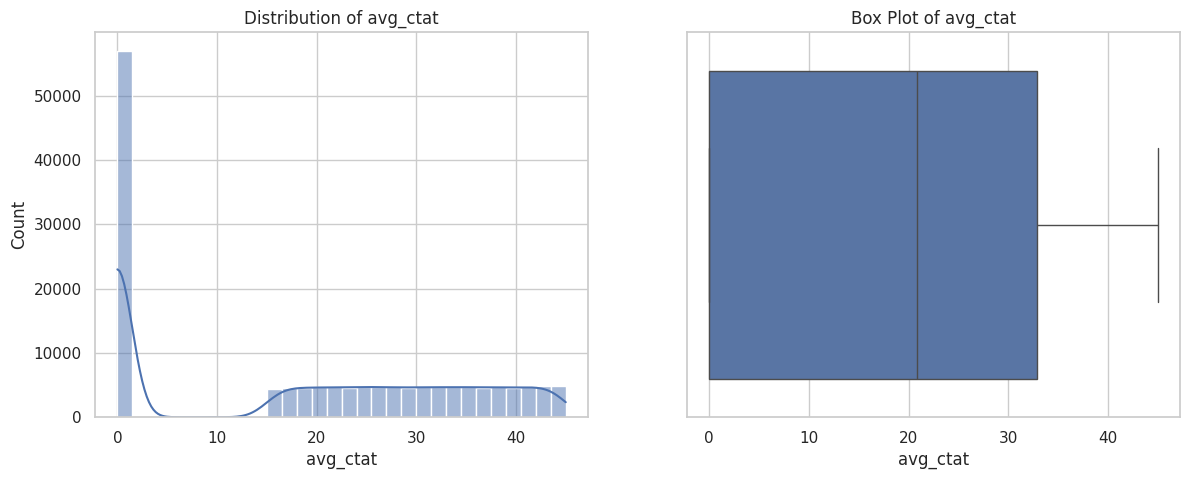

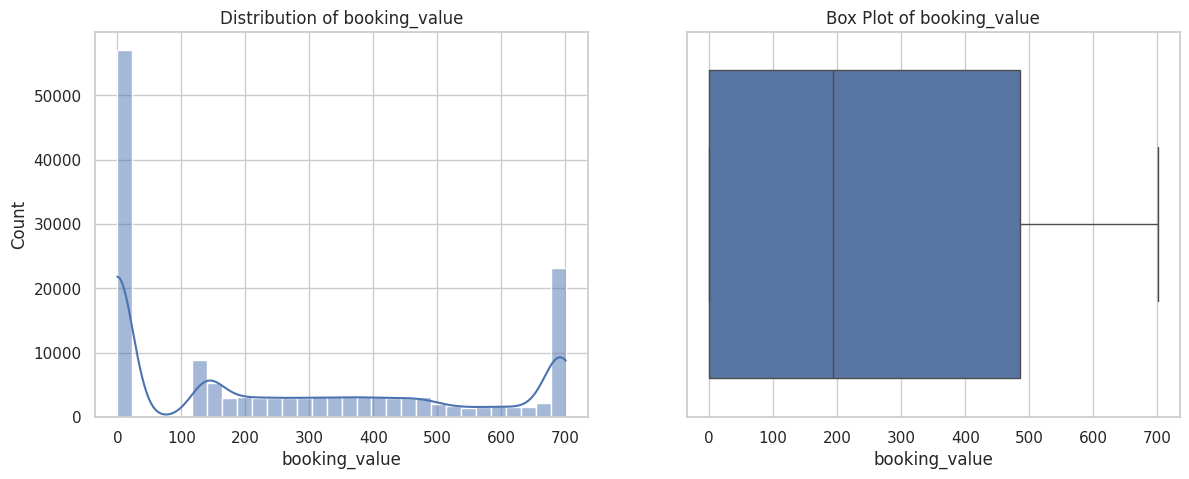

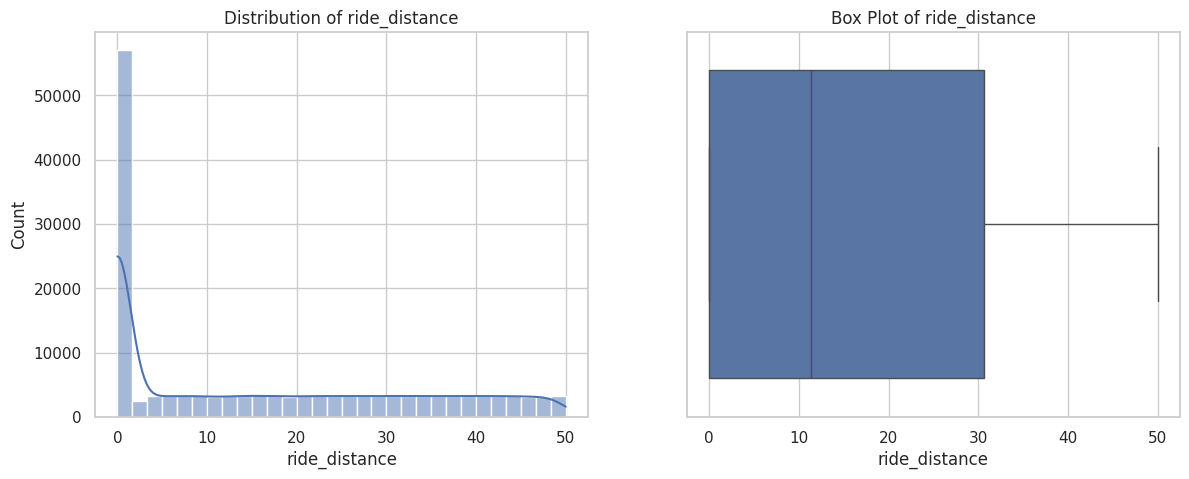

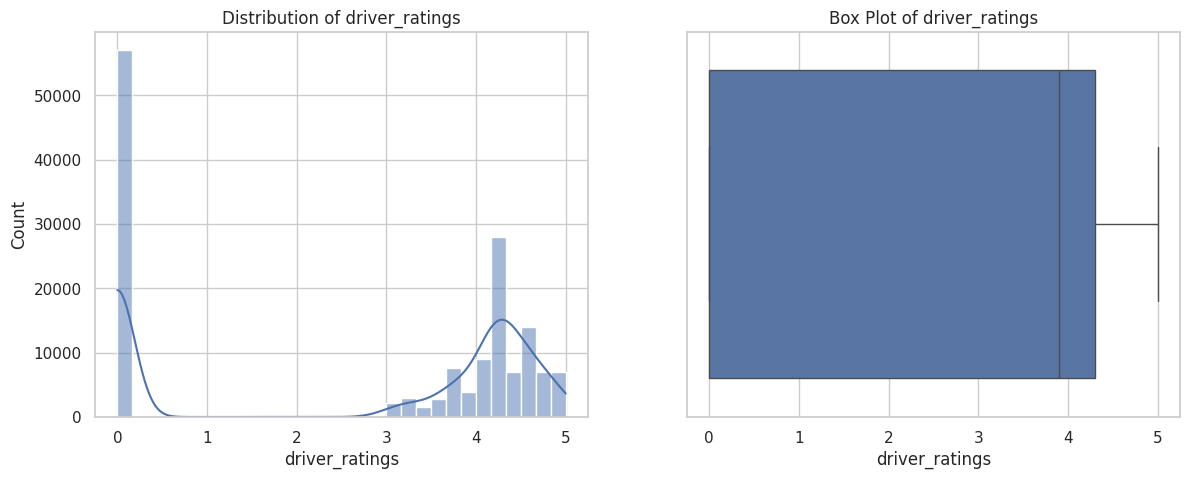

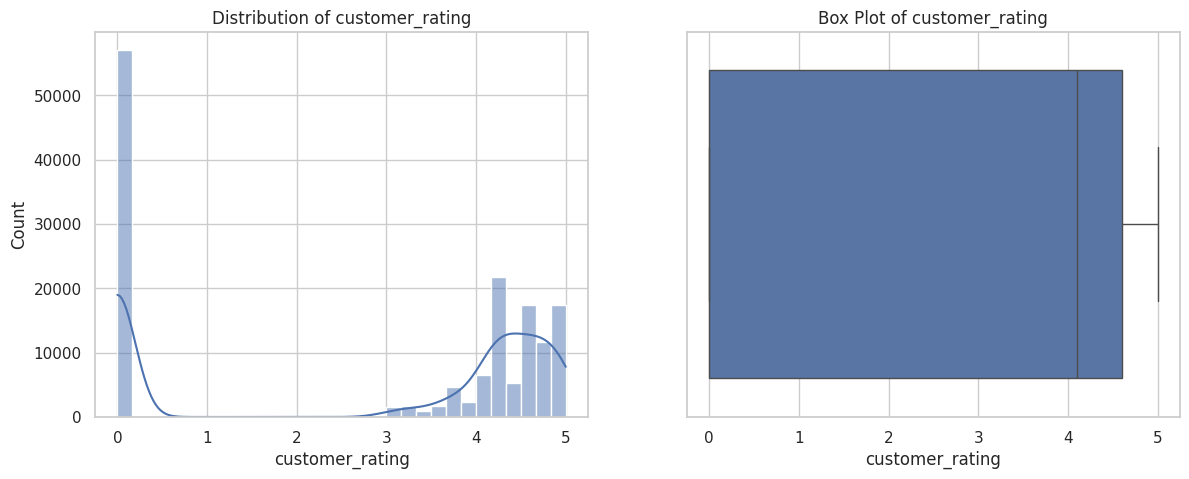

In [ ]:
sns.set(style="whitegrid")

print("Visualisation of the numerical columns ")
for col in numerical_cols:
    plt.figure(figsize=(14,5))

    # Histogram to see the distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    # Box Plot to identify spread and outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

    plt.show()



Column: avg_vtat
Number of outliers detected: 0
Percentage of outliers: 0.00%


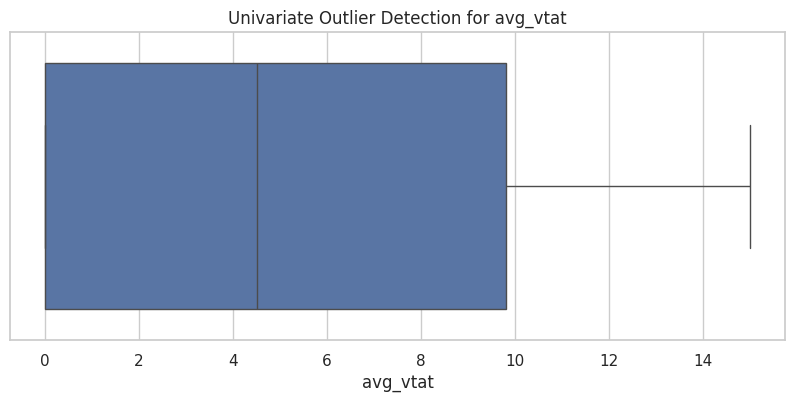


Column: avg_ctat
Number of outliers detected: 0
Percentage of outliers: 0.00%


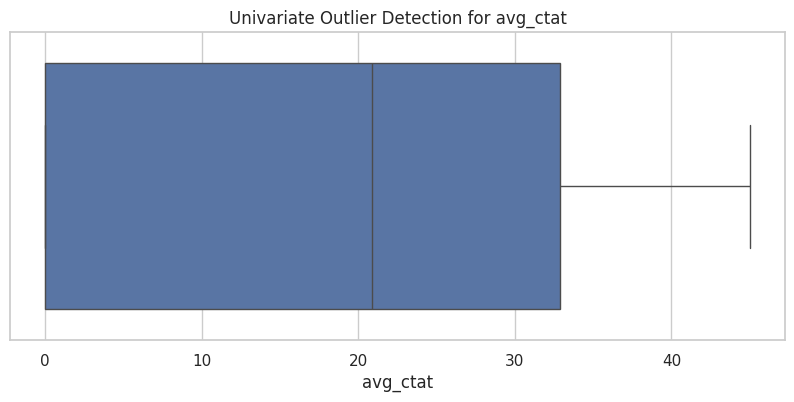


Column: booking_value
Number of outliers detected: 0
Percentage of outliers: 0.00%


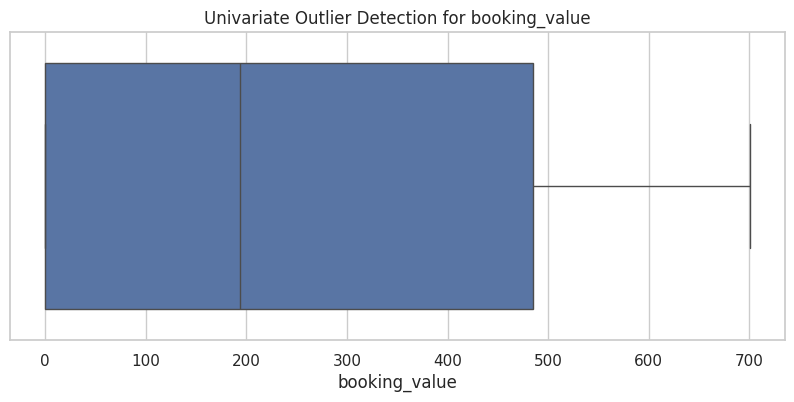


Column: ride_distance
Number of outliers detected: 0
Percentage of outliers: 0.00%


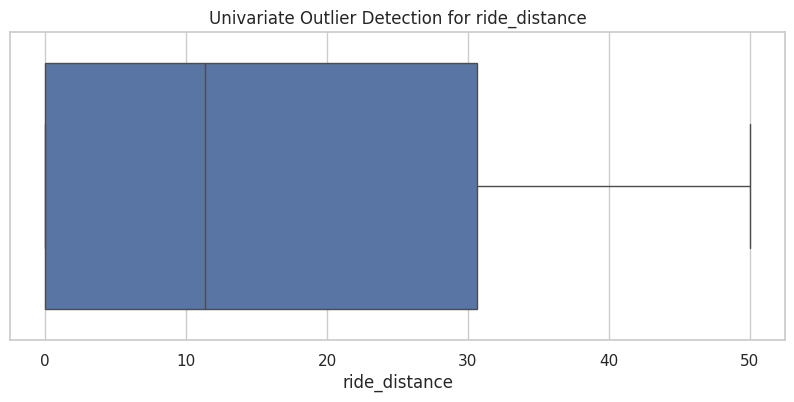


Column: driver_ratings
Number of outliers detected: 0
Percentage of outliers: 0.00%


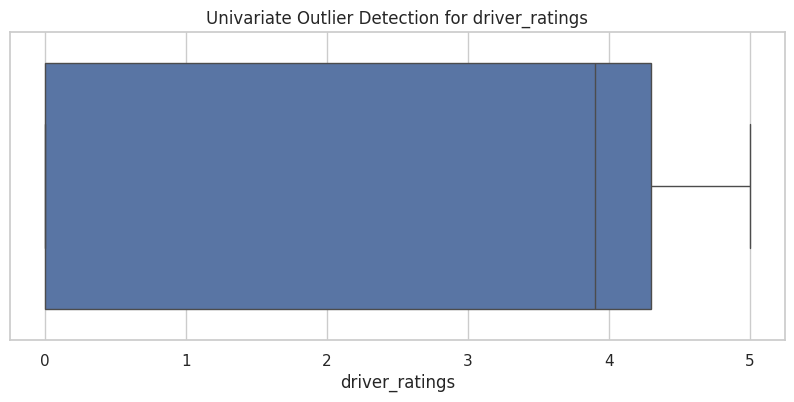


Column: customer_rating
Number of outliers detected: 0
Percentage of outliers: 0.00%


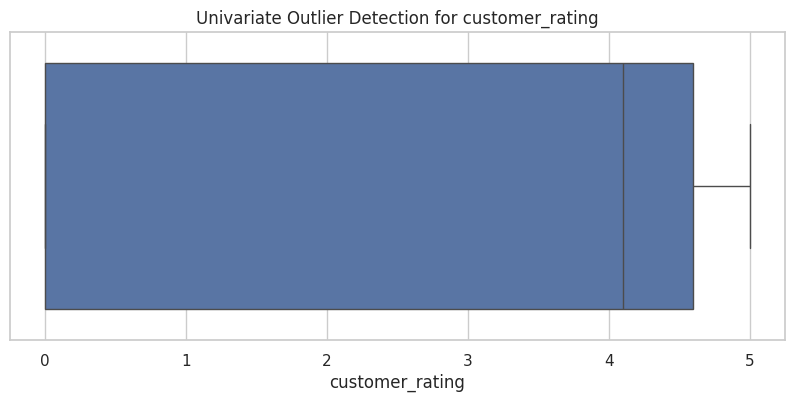

In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Number of outliers detected: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")

    # Visualize with a box plot (drop NaNs to avoid errors)
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Univariate Outlier Detection for {col}')
    plt.show()


/tmp/ipython-input-454550247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index, palette='viridis')


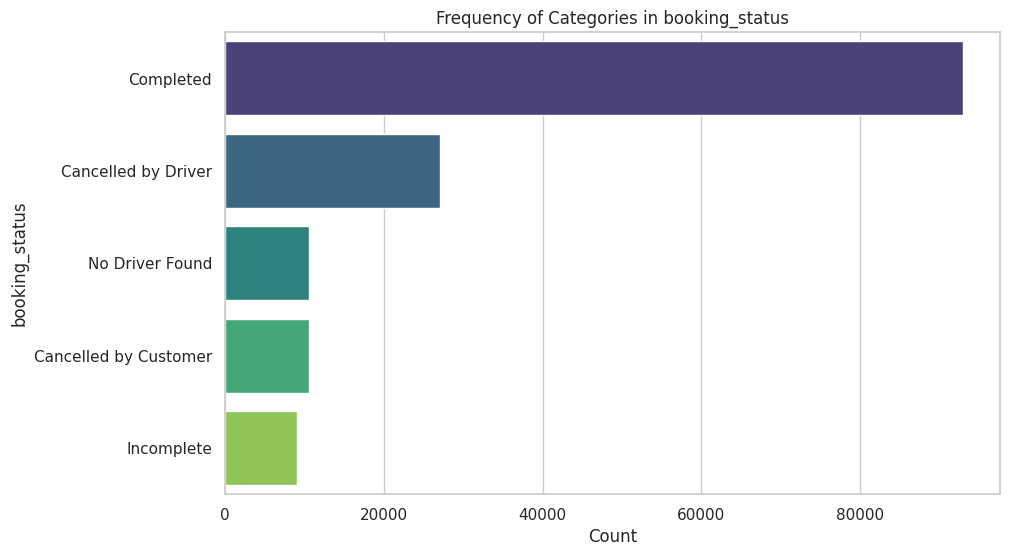


Value Counts for booking_status
booking_status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


/tmp/ipython-input-454550247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index, palette='viridis')


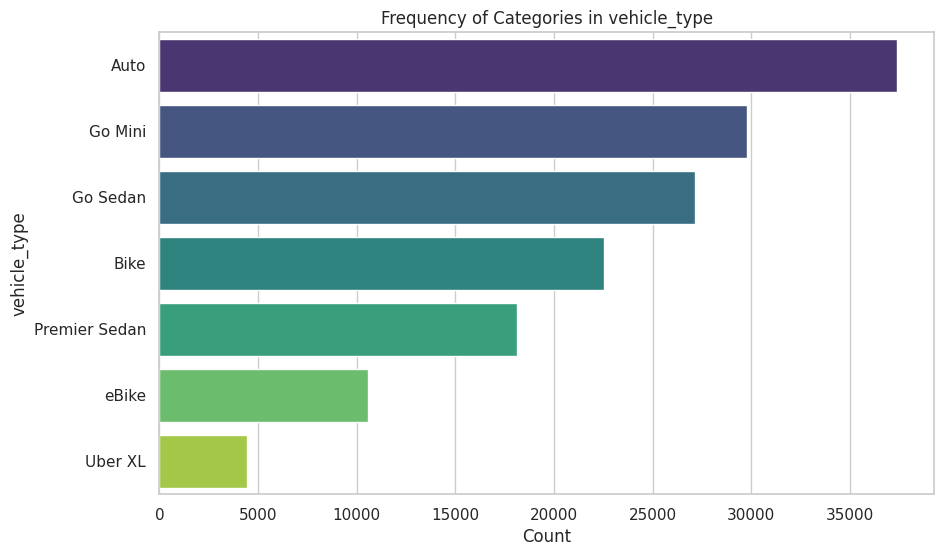


Value Counts for vehicle_type
vehicle_type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64


/tmp/ipython-input-454550247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index, palette='viridis')


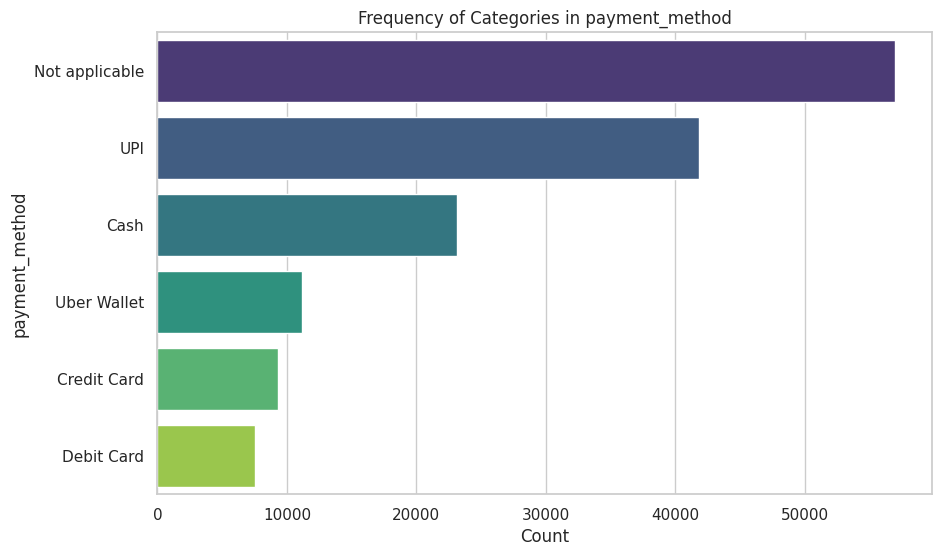


Value Counts for payment_method
payment_method
Not applicable    57000
UPI               41834
Cash              23114
Uber Wallet       11206
Credit Card        9320
Debit Card         7526
Name: count, dtype: int64


In [ ]:
categorical_cols = ['booking_status', 'vehicle_type', 'payment_method']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

    print(f"\nValue Counts for {col}")
    print(df[col].value_counts())


**BIVARIATE ANALYSIS**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


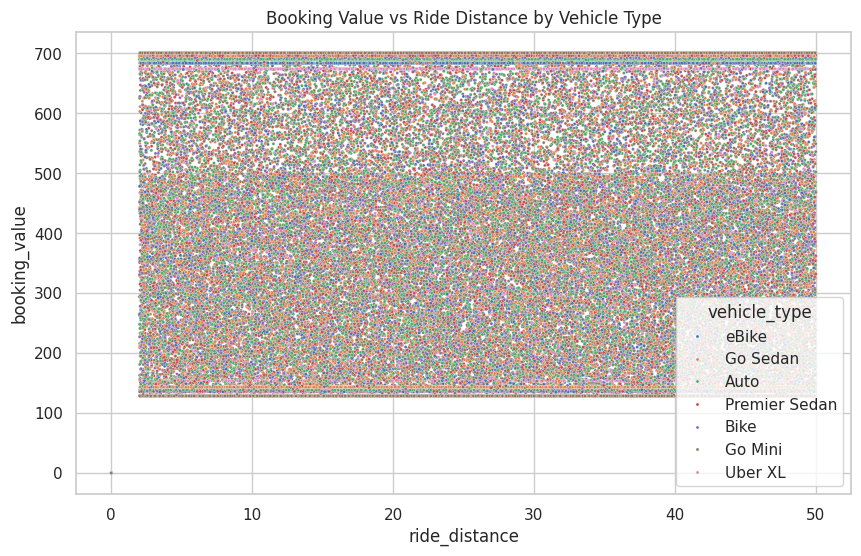

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ride_distance', y='booking_value', hue='vehicle_type', data=df, alpha=1, s=5)
plt.title('Booking Value vs Ride Distance by Vehicle Type')
plt.show()


<Figure size 1200x800 with 0 Axes>

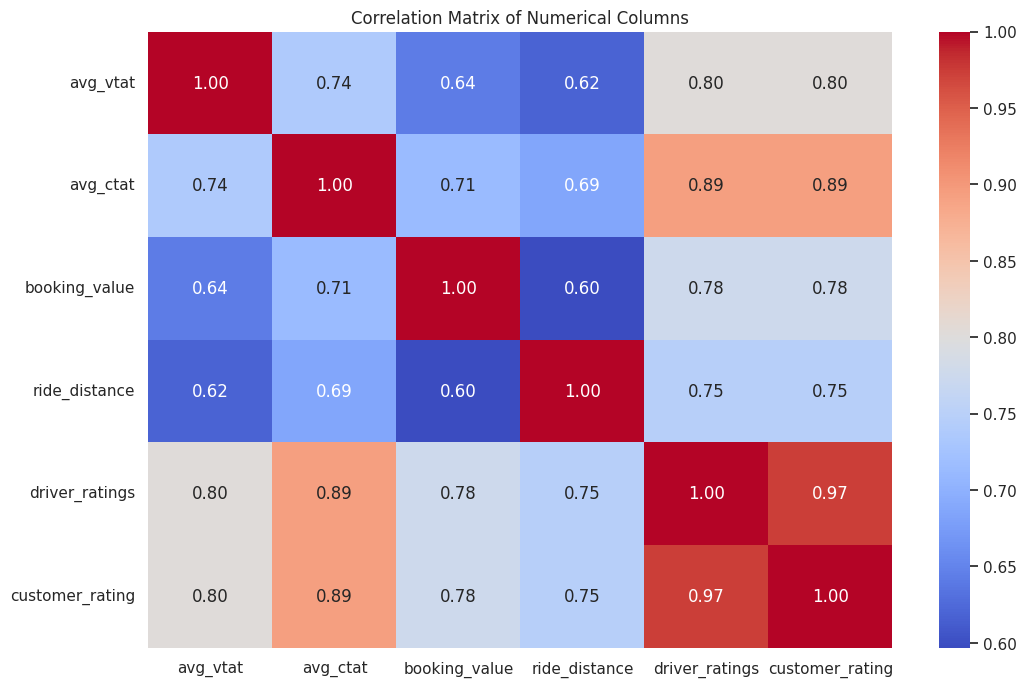

In [ ]:
plt.figure(figsize=(12, 8))

numerical_cols = ['avg_vtat', 'avg_ctat', 'booking_value',
                  'ride_distance', 'driver_ratings', 'customer_rating']


plt.figure(figsize=(12,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

/tmp/ipython-input-597304510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vehicle_type', y='booking_value', data=df, palette='plasma')


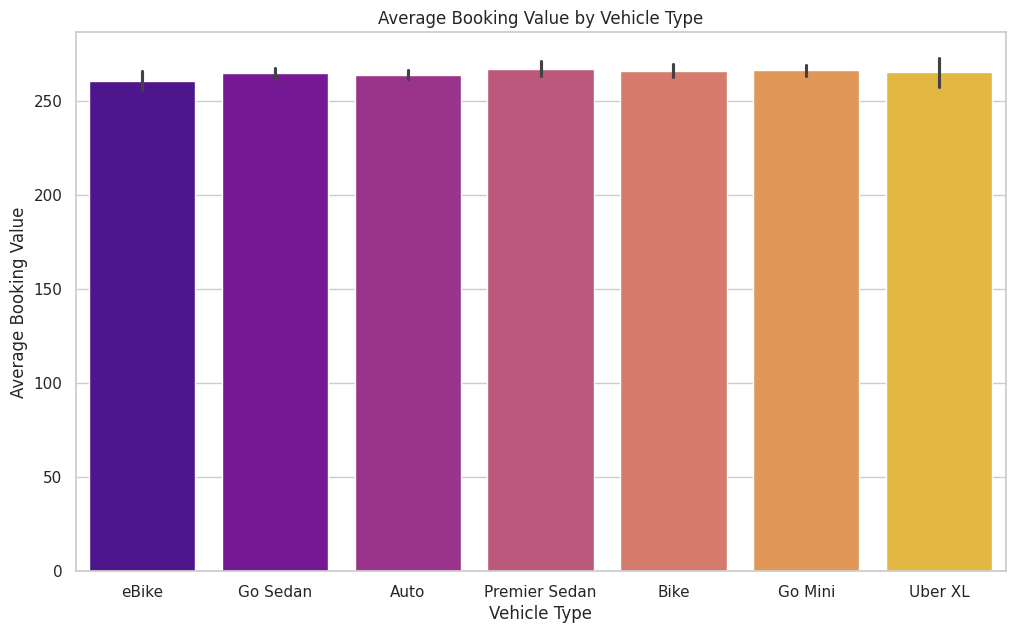

In [ ]:
df_completed = df[df['booking_status'].str.lower() == 'completed']
plt.figure(figsize=(12, 7))
sns.barplot(x='vehicle_type', y='booking_value', data=df, palette='plasma')
plt.title('Average Booking Value by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Booking Value')
plt.show()

In [ ]:
df[df['booking_status'].str.lower() != 'completed'][['driver_ratings','customer_rating']].head()

,driver_ratings,customer_rating
0,4.3,4.5
1,4.3,4.5
8,4.3,4.5
9,4.3,4.4
11,4.3,4.4


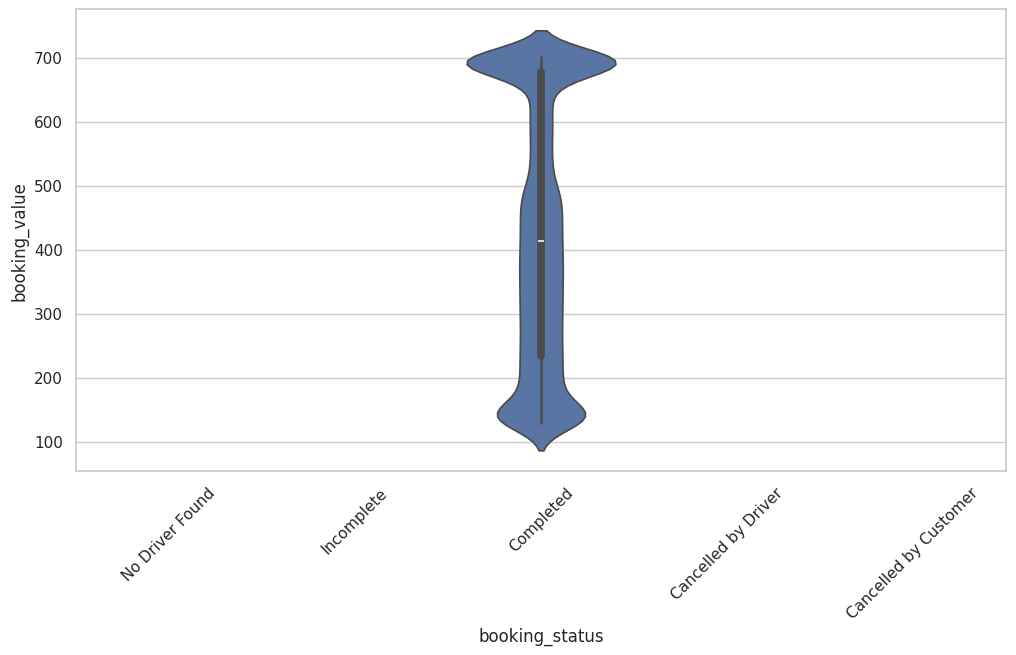

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='booking_status', y='booking_value', data=df)
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-751732212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['booking_status'], y=df['driver_ratings'], palette='viridis')


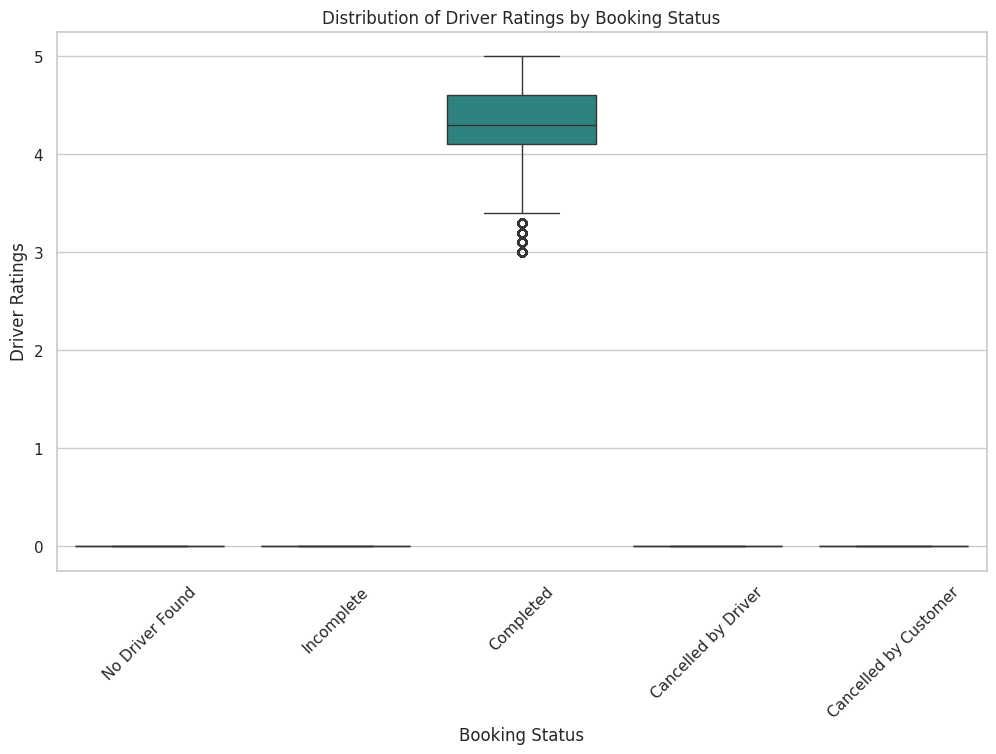

In [ ]:

plt.figure(figsize=(12, 7))
sns.boxplot(x=df['booking_status'], y=df['driver_ratings'], palette='viridis')
plt.title('Distribution of Driver Ratings by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Driver Ratings')
plt.xticks(rotation=45)
plt.show()


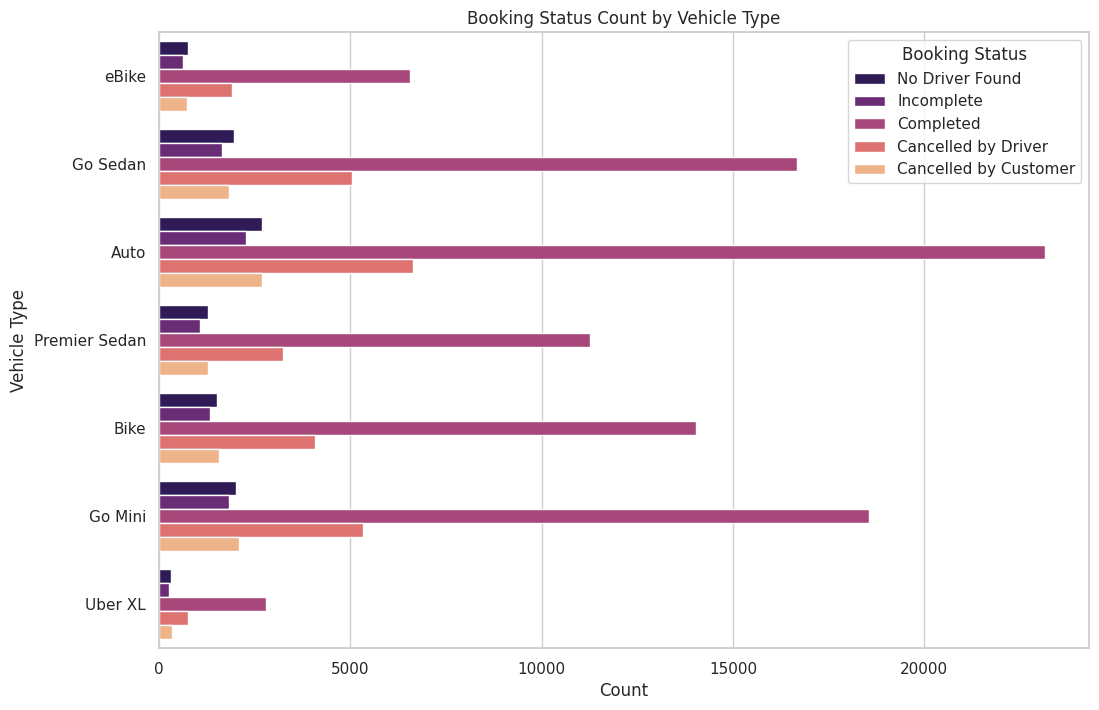


Bivariate analysis complete.


In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['vehicle_type'], hue=df['booking_status'],palette='magma')
plt.title('Booking Status Count by Vehicle Type')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.legend(title='Booking Status')
plt.show()



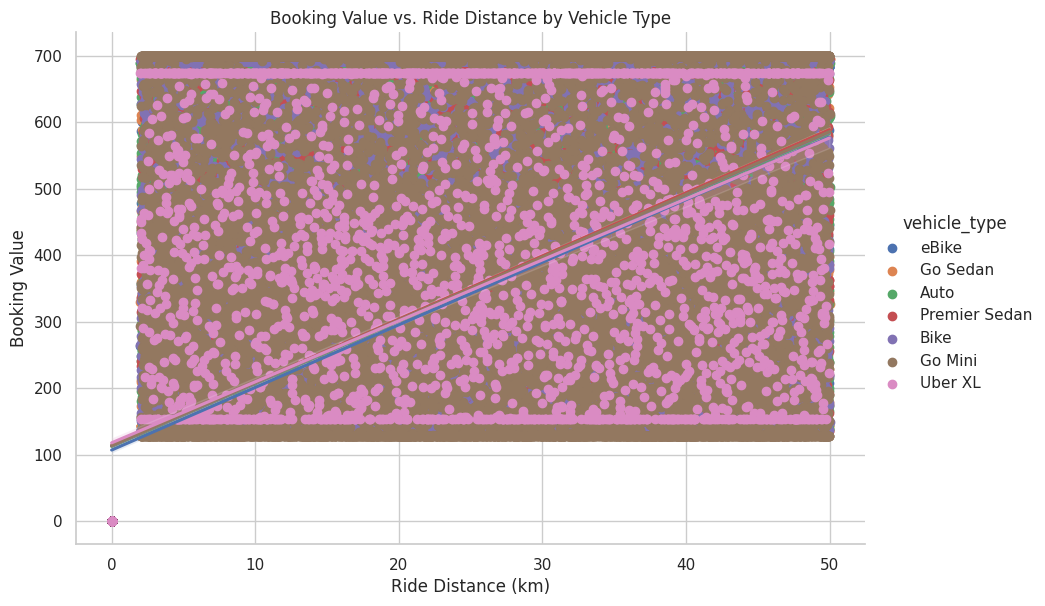

In [ ]:
sns.lmplot(x='ride_distance', y='booking_value', hue='vehicle_type', data=df,
           aspect=1.5, height=6, scatter_kws={'alpha':1})
plt.title('Booking Value vs. Ride Distance by Vehicle Type')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value')
plt.show()




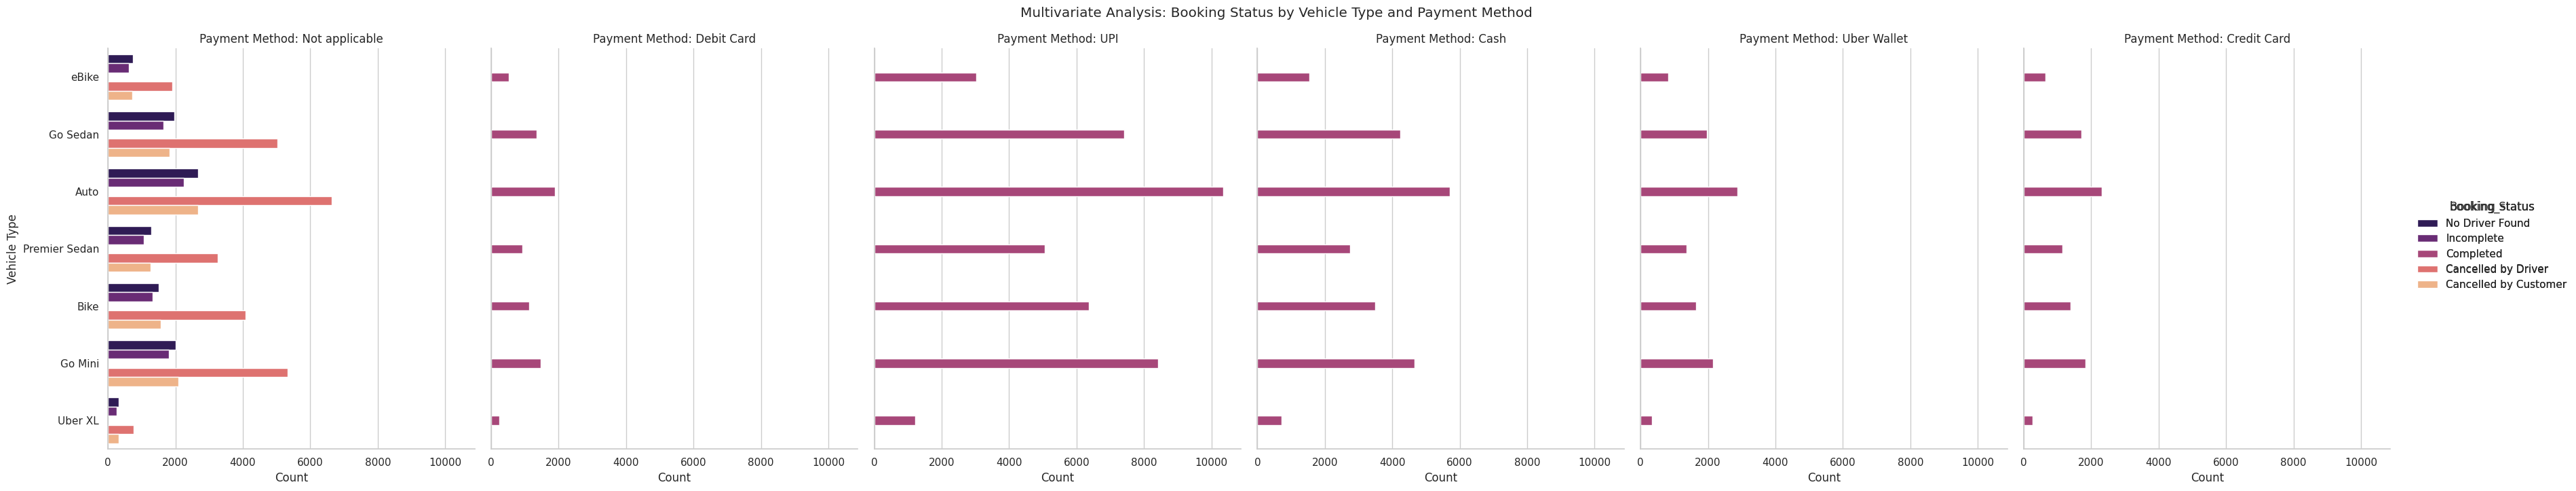

In [ ]:
g = sns.catplot(y='vehicle_type', hue='booking_status', col='payment_method',
                data=df, kind='count', palette='magma',
                height=7, aspect=0.8)
g.fig.suptitle('Multivariate Analysis: Booking Status by Vehicle Type and Payment Method', y=1.03)
g.set_axis_labels('Count', 'Vehicle Type')
g.set_titles("Payment Method: {col_name}")
g.add_legend(title='Booking Status')

plt.show()


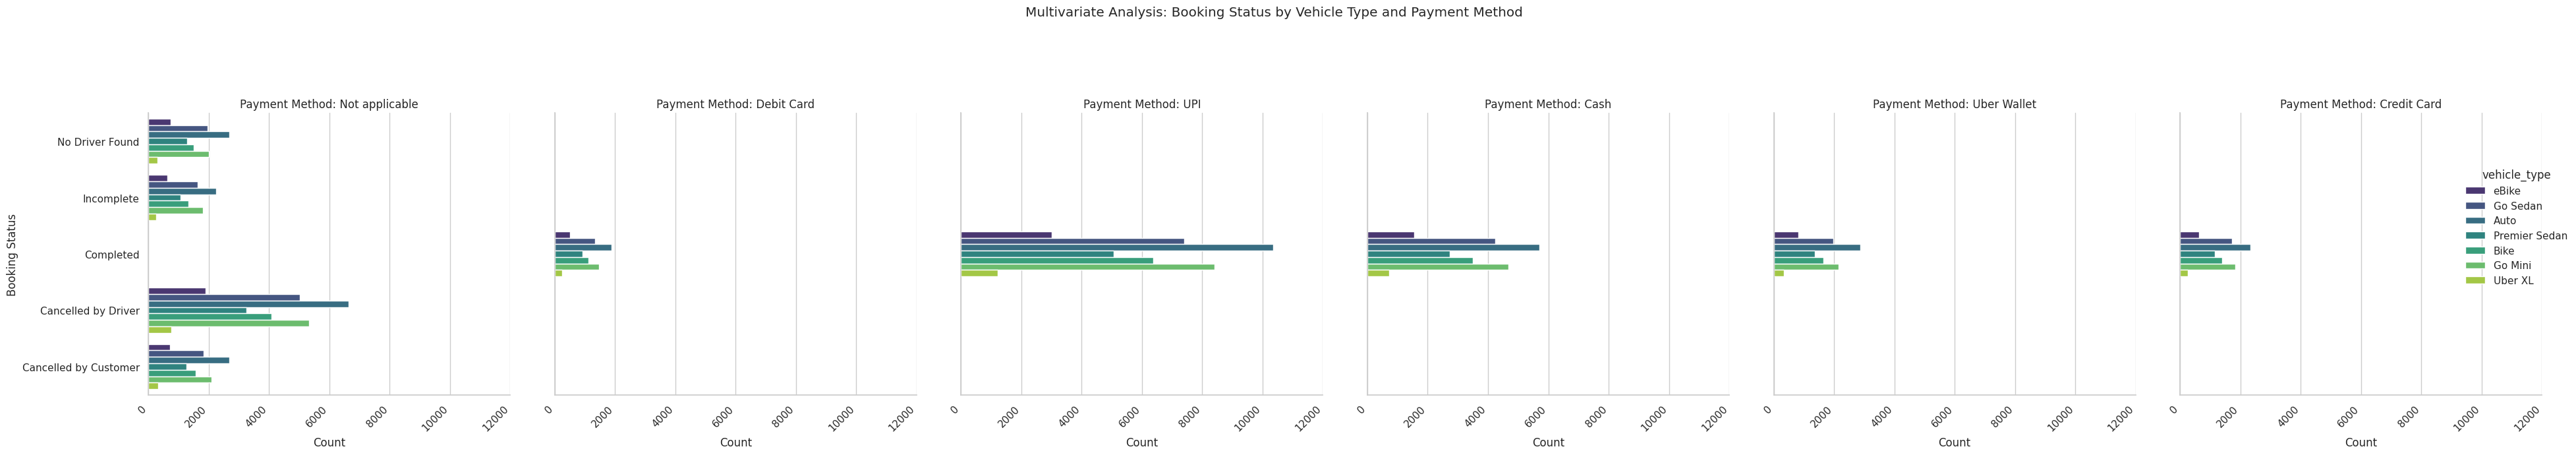

In [ ]:
g = sns.catplot(y='booking_status', hue='vehicle_type', col='payment_method',
                data=df, kind='count', palette='viridis',
                height=7, aspect=0.9)
g.fig.suptitle('Multivariate Analysis: Booking Status by Vehicle Type and Payment Method', y=1.03)
g.set_axis_labels('Count', 'Booking Status')
g.set_titles("Payment Method: {col_name}")
g.set_xticklabels(rotation=45, horizontalalignment='right')
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Create new time-based features
df['hourOfDay'] = df['time'].apply(lambda x: x.hour)
df['dayOfWeek'] = df['date'].dt.day_name()

# Create 'PricePerKM' feature
# We add a small constant to Ride Distance to avoid division by zero
df['priceperkm'] = df['booking_value'] / (df['ride_distance'] + 0.01)

/tmp/ipython-input-1225222809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hourOfDay', data=df, palette='crest')


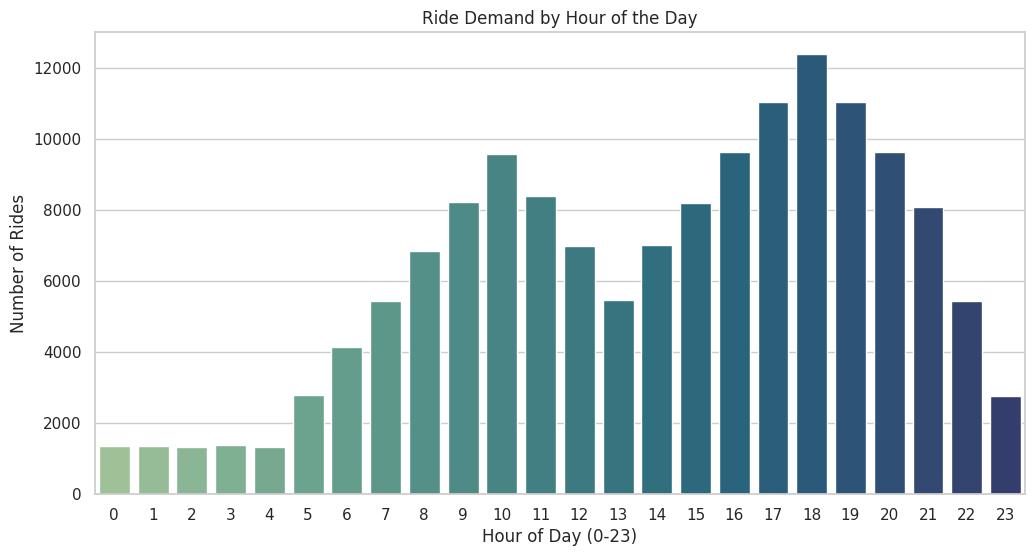

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hourOfDay', data=df, palette='crest')
plt.title('Ride Demand by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Rides')
plt.show()

/tmp/ipython-input-2124646261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dayOfWeek', data=df, order=days_order, palette='magma')


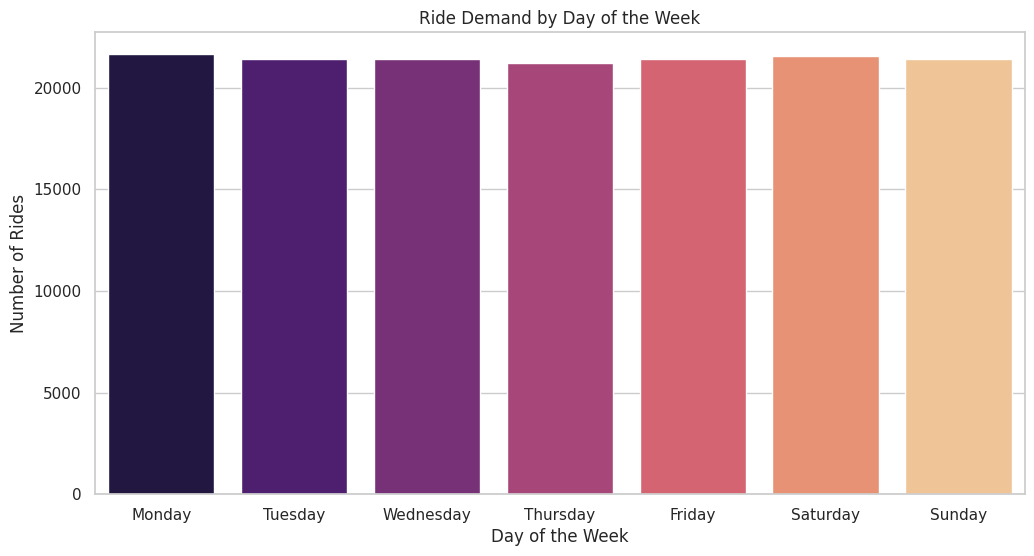

In [ ]:
plt.figure(figsize=(12, 6))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='dayOfWeek', data=df, order=days_order, palette='magma')
plt.title('Ride Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


/tmp/ipython-input-70653523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vehicle_type', y='priceperkm', data=df, palette='viridis')


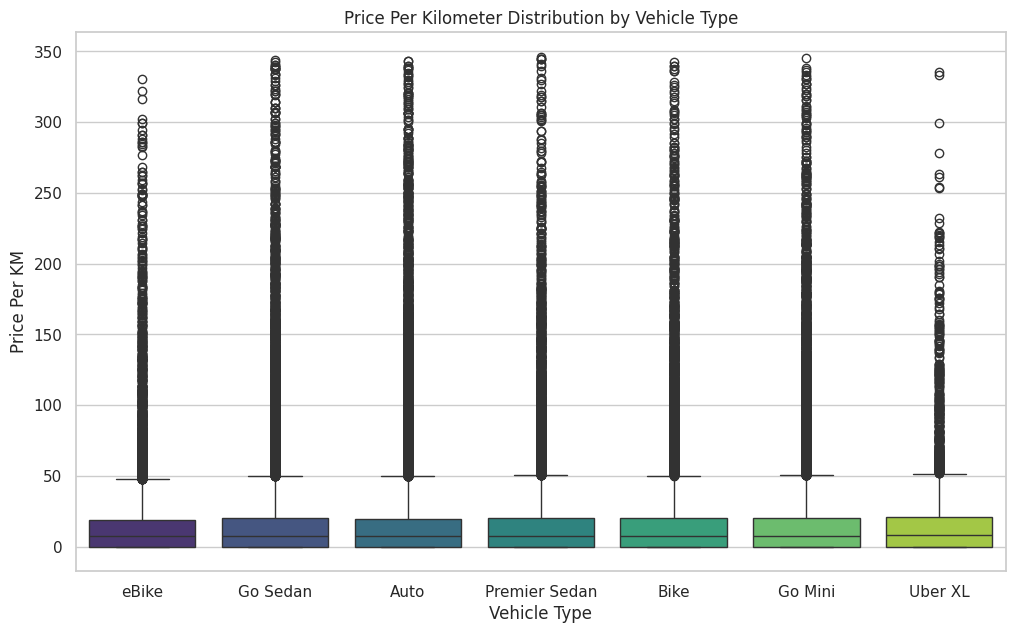

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='vehicle_type', y='priceperkm', data=df, palette='viridis')
plt.title('Price Per Kilometer Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price Per KM')
plt.show()



/tmp/ipython-input-1951570424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_pickup.values, y=top_10_pickup.index, palette='rocket')


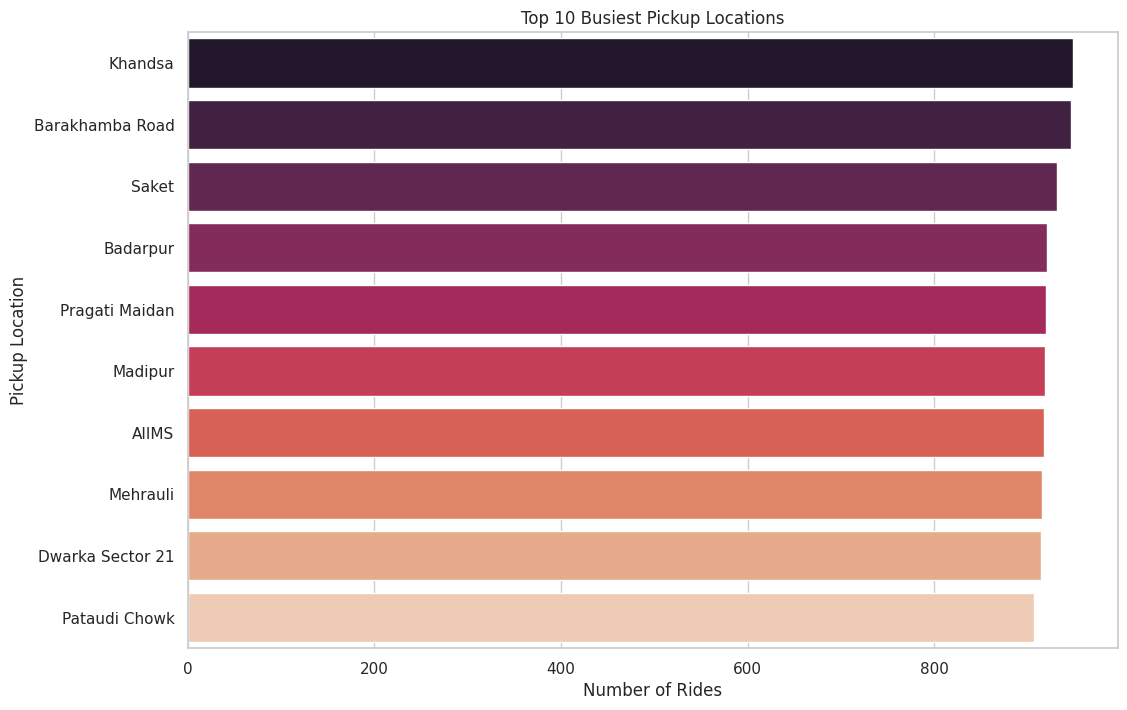

In [ ]:
plt.figure(figsize=(12, 8))
top_10_pickup = df['pickup_location'].value_counts().nlargest(10)
sns.barplot(x=top_10_pickup.values, y=top_10_pickup.index, palette='rocket')
plt.title('Top 10 Busiest Pickup Locations')
plt.xlabel('Number of Rides')
plt.ylabel('Pickup Location')
plt.show()


In [10]:
revenue_by_vehicle = df.groupby('vehicle_type')['booking_value'].sum().sort_values(ascending=False)
print(revenue_by_vehicle)

vehicle_type
Auto             11212011.0
Go Mini           8992315.0
Go Sedan          8163258.0
Bike              6800176.0
Premier Sedan     5480641.0
eBike             3126540.0
Uber XL           1339036.0
Name: booking_value, dtype: float64


/tmp/ipython-input-853208518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_vehicle.index, y=revenue_by_vehicle.values, palette='viridis')


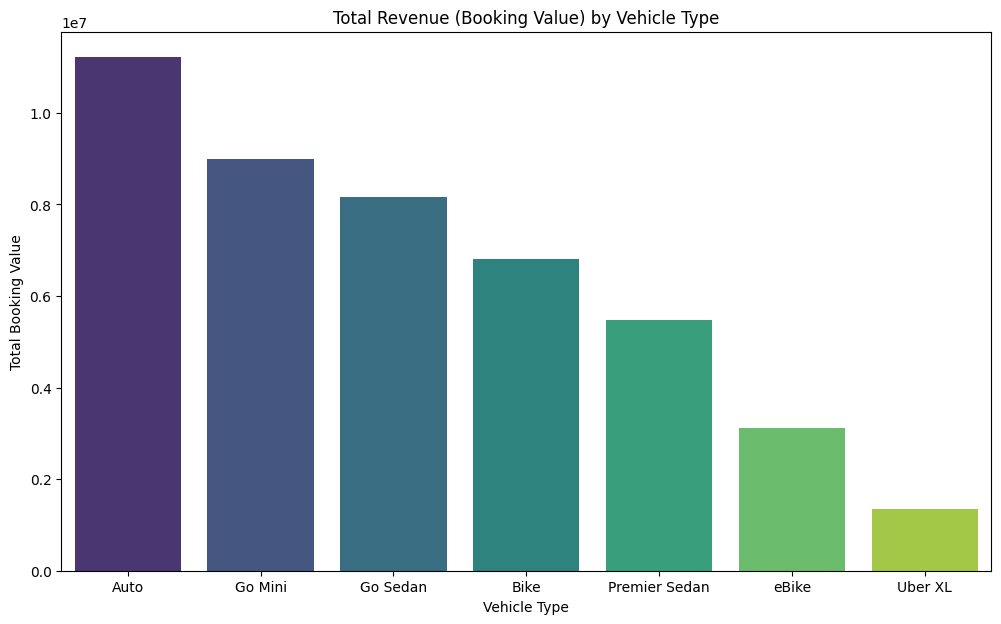

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(x=revenue_by_vehicle.index, y=revenue_by_vehicle.values, palette='viridis')
plt.title('Total Revenue (Booking Value) by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Booking Value')
plt.show()


In [16]:
df['date'] = pd.to_datetime(df['date'])
monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['booking_value'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

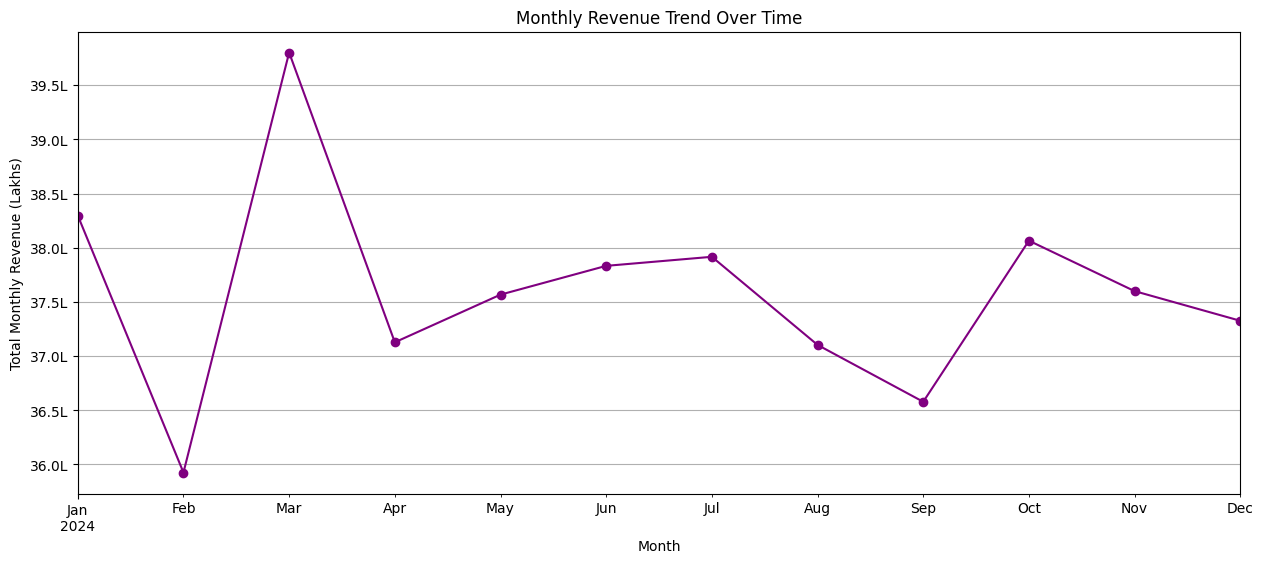

In [19]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,6))
monthly_revenue.plot(kind='line', marker='o', color='purple')

plt.title('Monthly Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Monthly Revenue (Lakhs)')

# Format axis in lakhs
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e5:.1f}L'))

plt.grid(True)
plt.show()

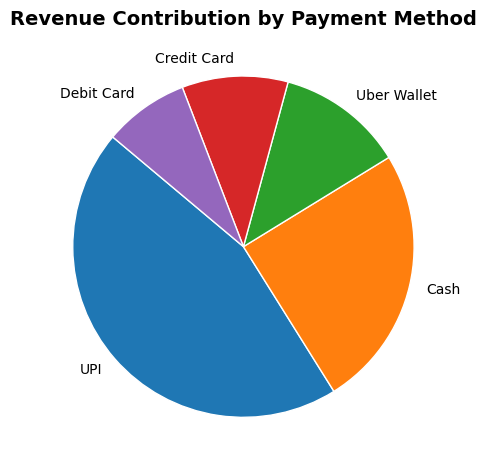

In [30]:
revenue_by_payment = (
    df[df['payment_method'].str.lower() != 'not applicable']
      .groupby('payment_method')['booking_value']
      .sum()
      .sort_values(ascending=False)
)

plt.pie(
    revenue_by_payment,
    labels=revenue_by_payment.index,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Revenue Contribution by Payment Method', fontsize=14, fontweight='bold')
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.tight_layout()
plt.show()

In [31]:

avg_booking_value = df[df['booking_status'].str.lower() == 'completed']['booking_value'].mean()
non_completed_rides = df[df['booking_status'].str.lower() != 'completed'].shape[0]
total_earned_revenue = df['booking_value'].sum()

potential_lost_revenue = non_completed_rides * avg_booking_value


print("\n--- Financial Impact Analysis ---")
print(f"Total Earned Revenue: ₹{total_earned_revenue/1e5:,.2f} Lakhs")  # divide by 1e5 for lakhs
print(f"Number of Non-Completed Rides: {non_completed_rides:,}")
print(f"Average Booking Value (Completed Ride): ₹{avg_booking_value:,.2f}")
print(f"Estimated Potential Lost Revenue: ₹{potential_lost_revenue/1e5:,.2f} Lakhs")



--- Financial Impact Analysis ---
Total Earned Revenue: ₹451.14 Lakhs
Number of Non-Completed Rides: 57,000
Average Booking Value (Completed Ride): ₹485.10
Estimated Potential Lost Revenue: ₹276.51 Lakhs


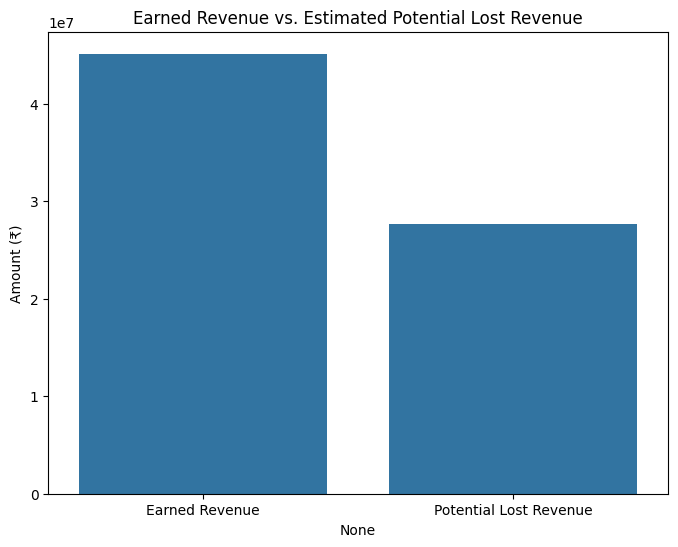

In [32]:

avg_booking_value = df[df['booking_status'].str.lower() == 'completed']['booking_value'].mean()
non_completed_rides = df[df['booking_status'].str.lower() != 'completed'].shape[0]
total_earned_revenue = df['booking_value'].sum()
potential_lost_revenue = non_completed_rides * avg_booking_value


revenue_comparison = pd.Series({
    'Earned Revenue': total_earned_revenue,
    'Potential Lost Revenue': potential_lost_revenue
})

plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_comparison.index, y=revenue_comparison.values)
plt.title('Earned Revenue vs. Estimated Potential Lost Revenue')
plt.ylabel('Amount (₹)')
plt.show()



--- Data cleaned. Starting advanced analysis... ---
--- Created 'time_of_day' feature ---


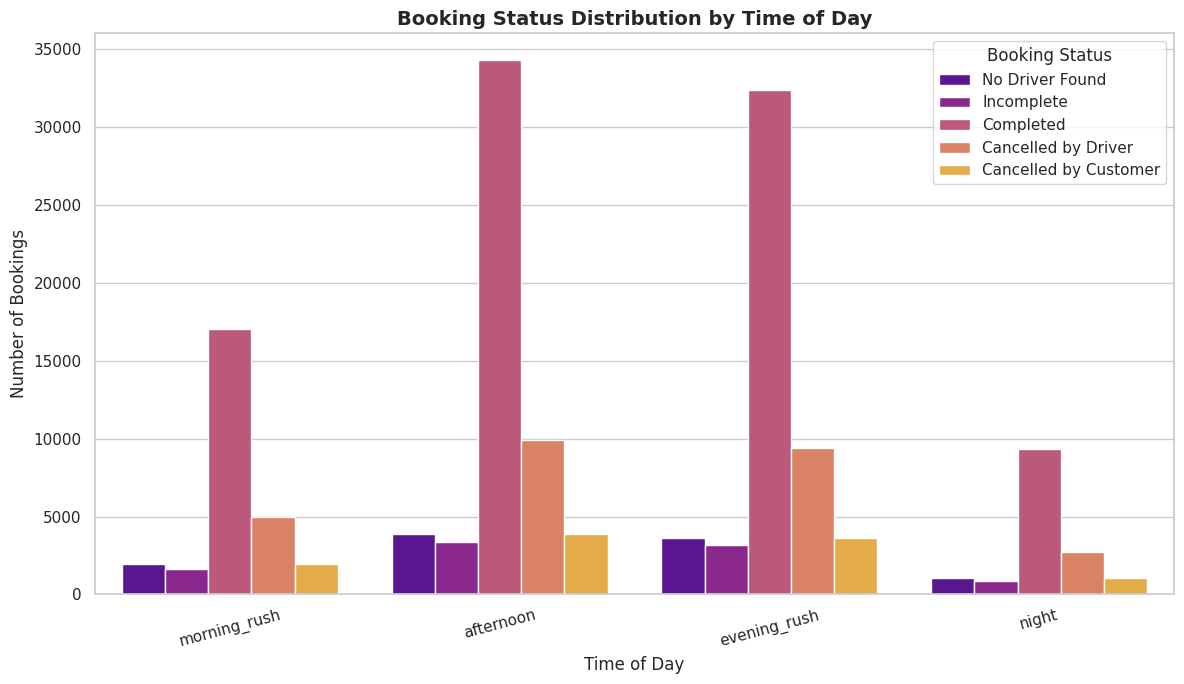

In [33]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['hour_of_day'] = df['time'].apply(lambda x: x.hour)

print("\nData cleaned. Starting advanced analysis")
sns.set(style="whitegrid")

def get_time_of_day(hour):
    if 5 <= hour < 10:
        return 'morning_rush'
    elif 10 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 22:
        return 'evening_rush'
    else:
        return 'night'

df['time_of_day'] = df['hour_of_day'].apply(get_time_of_day)

print("Created 'time_of_day' feature ")


plt.figure(figsize=(12, 7))
sns.countplot(x='time_of_day', hue='booking_status', data=df,
              order=['morning_rush', 'afternoon', 'evening_rush', 'night'],
              palette='plasma')

plt.title('Booking Status Distribution by Time of Day', fontsize=14, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.legend(title='Booking Status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [35]:
if 'customer_id' in df.columns:
    customer_revenue = df[df['booking_status'].str.lower() == 'completed'].groupby('customer_id')['booking_value'].sum()
    customer_revenue = customer_revenue.sort_values(ascending=False)


    customer_revenue_cum_pct = customer_revenue.cumsum() / customer_revenue.sum() * 100


    top_customers = customer_revenue_cum_pct[(customer_revenue_cum_pct >= 30) &
                                             (customer_revenue_cum_pct <= 80)]

    print("\n Top Customers Contributing to ~80% Revenue ")
    print(top_customers)
else:
    print("No 'customer_id' column found for repeat customer analysis.")



 Top Customers Contributing to ~80% Revenue 
customer_id
"CID9860506"    30.000760
"CID8969258"    30.002737
"CID9452114"    30.004715
"CID5518354"    30.006692
"CID1234520"    30.008669
                  ...    
"CID1271700"    79.995849
"CID7432876"    79.996689
"CID2042878"    79.997529
"CID4653442"    79.998369
"CID9760956"    79.999210
Name: booking_value, Length: 38485, dtype: float64



--- Top Cancellation Reasons by Customer ---
reason_for_cancelling_by_customer
Not applicable                                  46500
Wrong Address                                    2362
Change of plans                                  2353
Driver is not moving towards pickup location     2335
Driver asked to cancel                           2295
AC is not working                                1155
Name: count, dtype: int64


/tmp/ipython-input-3128409589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_cancel_reasons.index, y=customer_cancel_reasons.values, palette='magma')


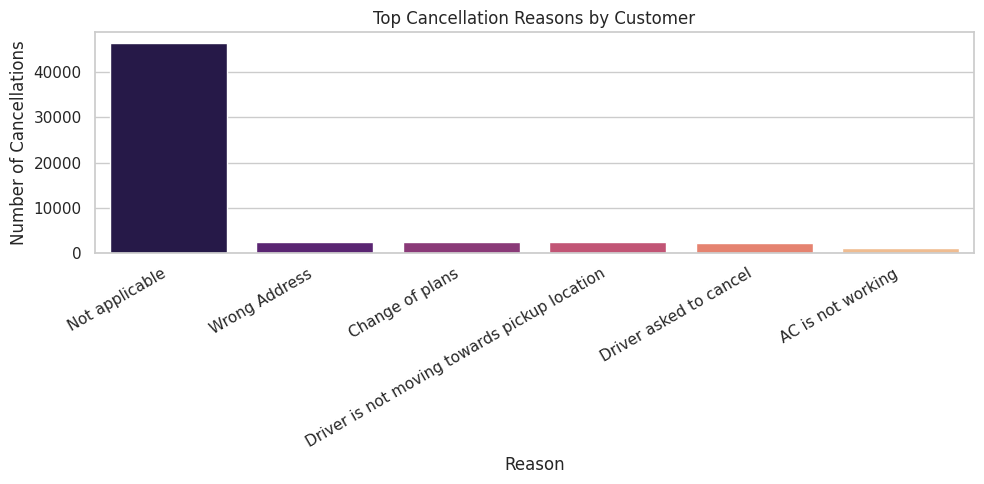

In [36]:
customer_cancel_reasons = (
    df[df['booking_status'].str.lower() != 'completed']['reason_for_cancelling_by_customer']
    .value_counts()
)

print("\n--- Top Cancellation Reasons by Customer ---")
print(customer_cancel_reasons)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=customer_cancel_reasons.index, y=customer_cancel_reasons.values, palette='magma')
plt.title('Top Cancellation Reasons by Customer')
plt.xlabel('Reason')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


--- Top Cancellation Reasons by Driver ---
driver_cancellation_reason
Not applicable                         30000
Customer related issue                  6837
The customer was coughing/sick          6751
Personal & Car related issues           6726
More than permitted people in there     6686
Name: count, dtype: int64


/tmp/ipython-input-1540366663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_cancel_reasons.index, y=driver_cancel_reasons.values, palette='plasma')


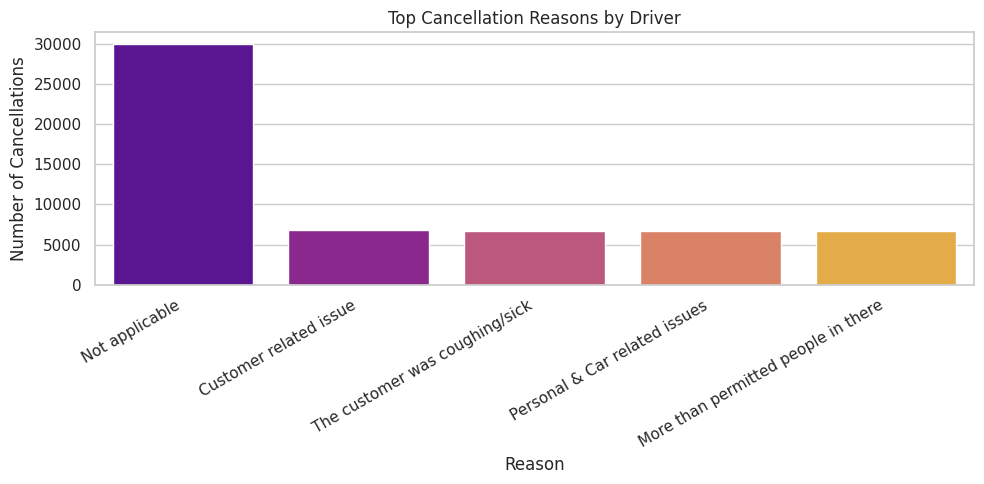

In [37]:
driver_cancel_reasons = (
    df[df['booking_status'].str.lower() != 'completed']['driver_cancellation_reason']
    .value_counts()
)

print("\n--- Top Cancellation Reasons by Driver ---")
print(driver_cancel_reasons)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=driver_cancel_reasons.index, y=driver_cancel_reasons.values, palette='plasma')
plt.title('Top Cancellation Reasons by Driver')
plt.xlabel('Reason')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

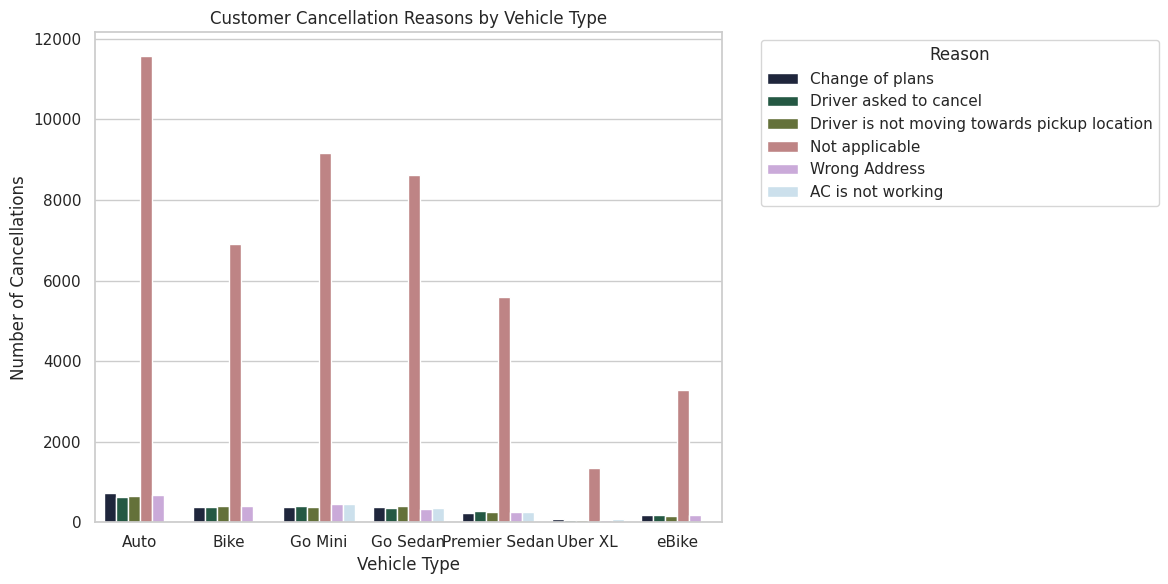

In [38]:
cancel_by_vehicle = (
    df[df['booking_status'].str.lower() != 'completed']
    .groupby(['vehicle_type', 'reason_for_cancelling_by_customer']).size()
    .reset_index(name='count')
)

plt.figure(figsize=(12,6))
sns.barplot(data=cancel_by_vehicle, x='vehicle_type', y='count', hue='reason_for_cancelling_by_customer', palette='cubehelix')
plt.title('Customer Cancellation Reasons by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Cancellations')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

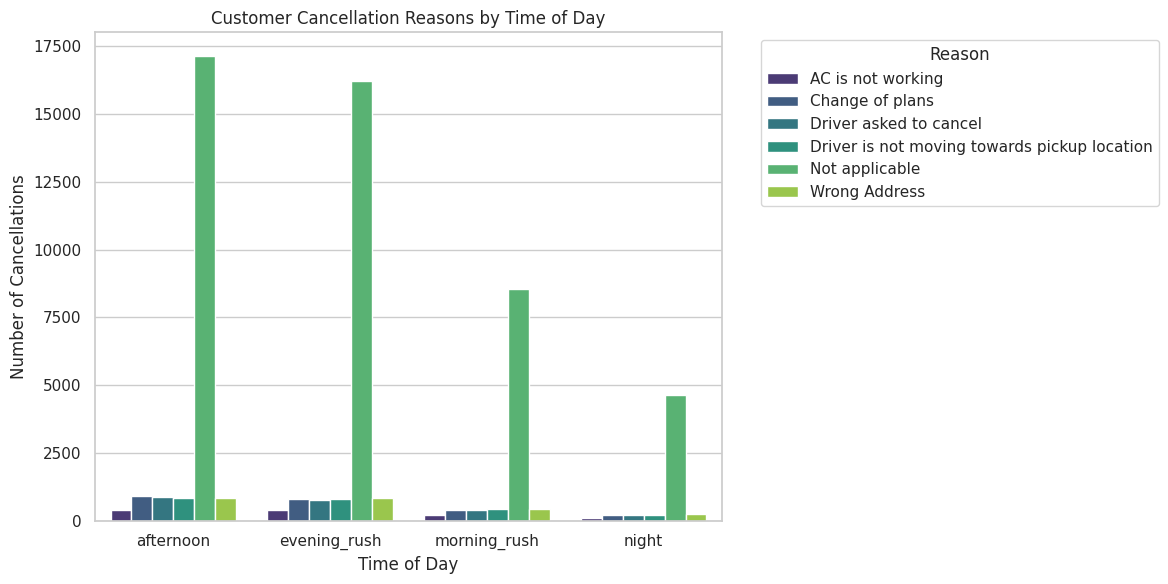

In [39]:
cancel_by_time = (
    df[df['booking_status'].str.lower() != 'completed']
    .groupby(['time_of_day', 'reason_for_cancelling_by_customer']).size()
    .reset_index(name='count')
)

plt.figure(figsize=(12,6))
sns.barplot(data=cancel_by_time, x='time_of_day', y='count', hue='reason_for_cancelling_by_customer', palette='viridis')
plt.title('Customer Cancellation Reasons by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Cancellations')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

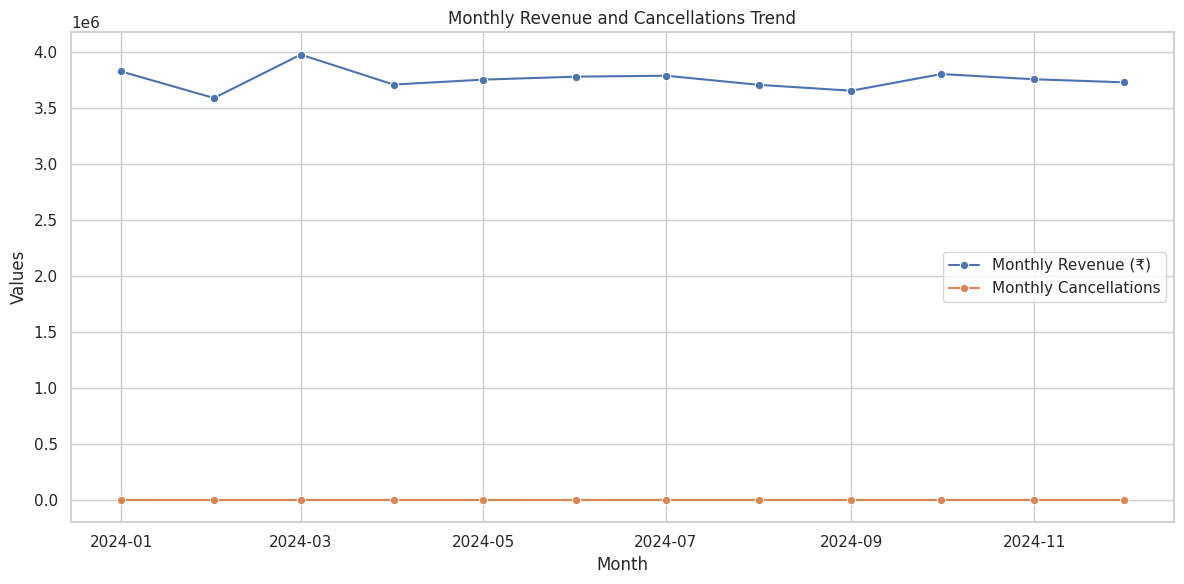

In [40]:

df['date'] = pd.to_datetime(df['date'])

monthly_revenue = (
    df.groupby(df['date'].dt.to_period('M'))['booking_value']
    .sum()
    .to_timestamp()
)


monthly_cancellations = (
    df[df['booking_status'].str.lower() != 'completed']
    .groupby(df['date'].dt.to_period('M')).size()
    .to_timestamp()
)


plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, label='Monthly Revenue (₹)', marker='o')
sns.lineplot(x=monthly_cancellations.index, y=monthly_cancellations.values, label='Monthly Cancellations', marker='o')
plt.title('Monthly Revenue and Cancellations Trend')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


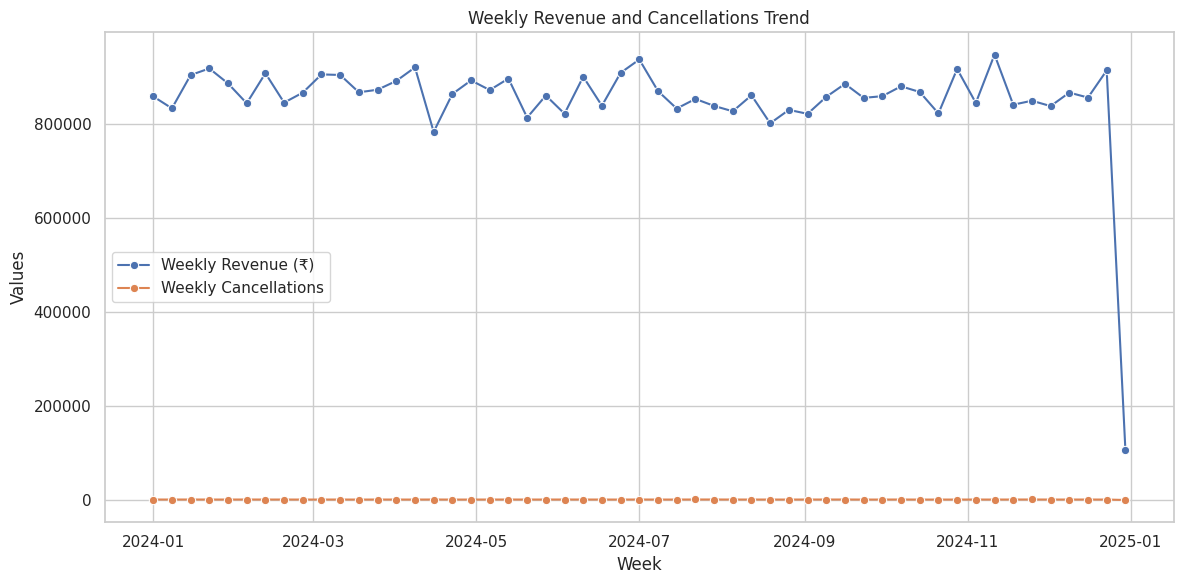

In [41]:
# Weekly revenue
weekly_revenue = (
    df.groupby(df['date'].dt.to_period('W'))['booking_value']
    .sum()
    .to_timestamp()
)

# Weekly cancellations count
weekly_cancellations = (
    df[df['booking_status'].str.lower() != 'completed']
    .groupby(df['date'].dt.to_period('W')).size()
    .to_timestamp()
)

plt.figure(figsize=(12,6))
sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values, label='Weekly Revenue (₹)', marker='o')
sns.lineplot(x=weekly_cancellations.index, y=weekly_cancellations.values, label='Weekly Cancellations', marker='o')
plt.title('Weekly Revenue and Cancellations Trend')
plt.xlabel('Week')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-480274101.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['booking_status'].str.lower() != 'completed').mean() * 100)
/tmp/ipython-input-480274101.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate_by_day.index, y=cancel_rate_by_day.values, palette='plasma')


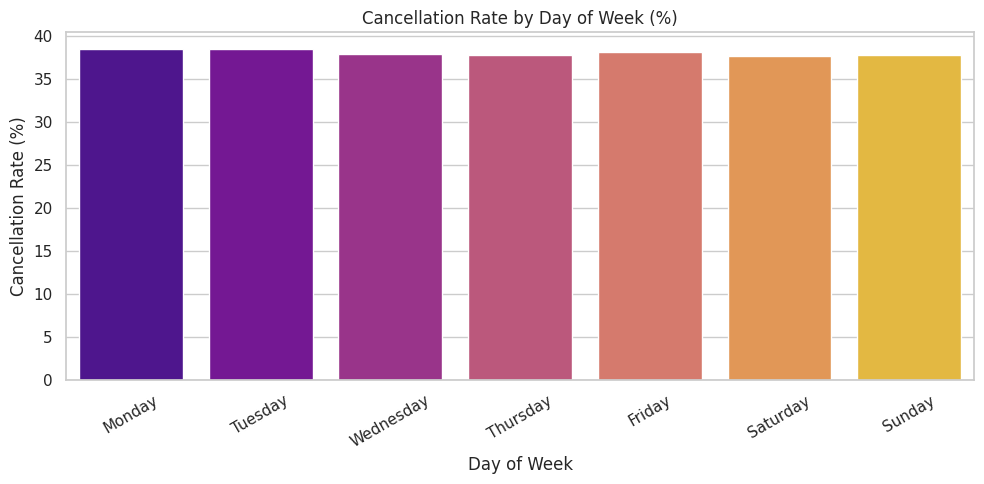

In [42]:
# Create day-of-week column
df['day_of_week'] = df['date'].dt.day_name()

# Cancellation rate by day of week
cancel_rate_by_day = (
    df.groupby('day_of_week')
    .apply(lambda x: (x['booking_status'].str.lower() != 'completed').mean() * 100)
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)

plt.figure(figsize=(10,5))
sns.barplot(x=cancel_rate_by_day.index, y=cancel_rate_by_day.values, palette='plasma')
plt.title('Cancellation Rate by Day of Week (%)')
plt.xlabel('Day of Week')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



--- Top Cancellation Pickup Locations ---
pickup_location
Pragati Maidan    382
Saket             374
Vinobapuri        373
Akshardham        368
Badshahpur        362
Udyog Vihar       358
AIIMS             356
Badarpur          354
GTB Nagar         352
Nehru Place       352
Name: count, dtype: int64


/tmp/ipython-input-1104056898.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_pickup.values, y=cancel_pickup.index, palette='magma')


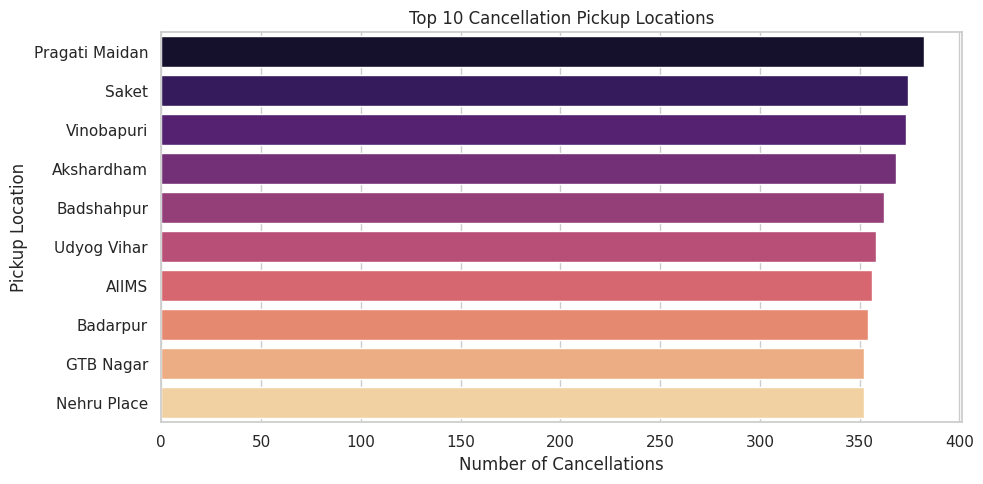

In [43]:
cancel_pickup = (
    df[df['booking_status'].str.lower() != 'completed']['pickup_location']
    .value_counts()
    .head(10)
)

print("\nTop Cancellation Pickup Locations")
print(cancel_pickup)

plt.figure(figsize=(10,5))
sns.barplot(x=cancel_pickup.values, y=cancel_pickup.index, palette='magma')
plt.title('Top 10 Cancellation Pickup Locations')
plt.xlabel('Number of Cancellations')
plt.ylabel('Pickup Location')
plt.tight_layout()
plt.show()


--- Cancellation Hotspots by Area and Time ---
         pickup_location time_of_day  count
496       Pragati Maidan   afternoon    161
688           Vinobapuri   afternoon    152
564                Saket   afternoon    142
104  Civil Lines Gurgaon   afternoon    141
40                Ashram   afternoon    138
416          Nehru Place   afternoon    137
560           Saidulajab   afternoon    137
144            GTB Nagar   afternoon    137
200            Hauz Rani   afternoon    137
376          Mayur Vihar   afternoon    137


/tmp/ipython-input-2049437355.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


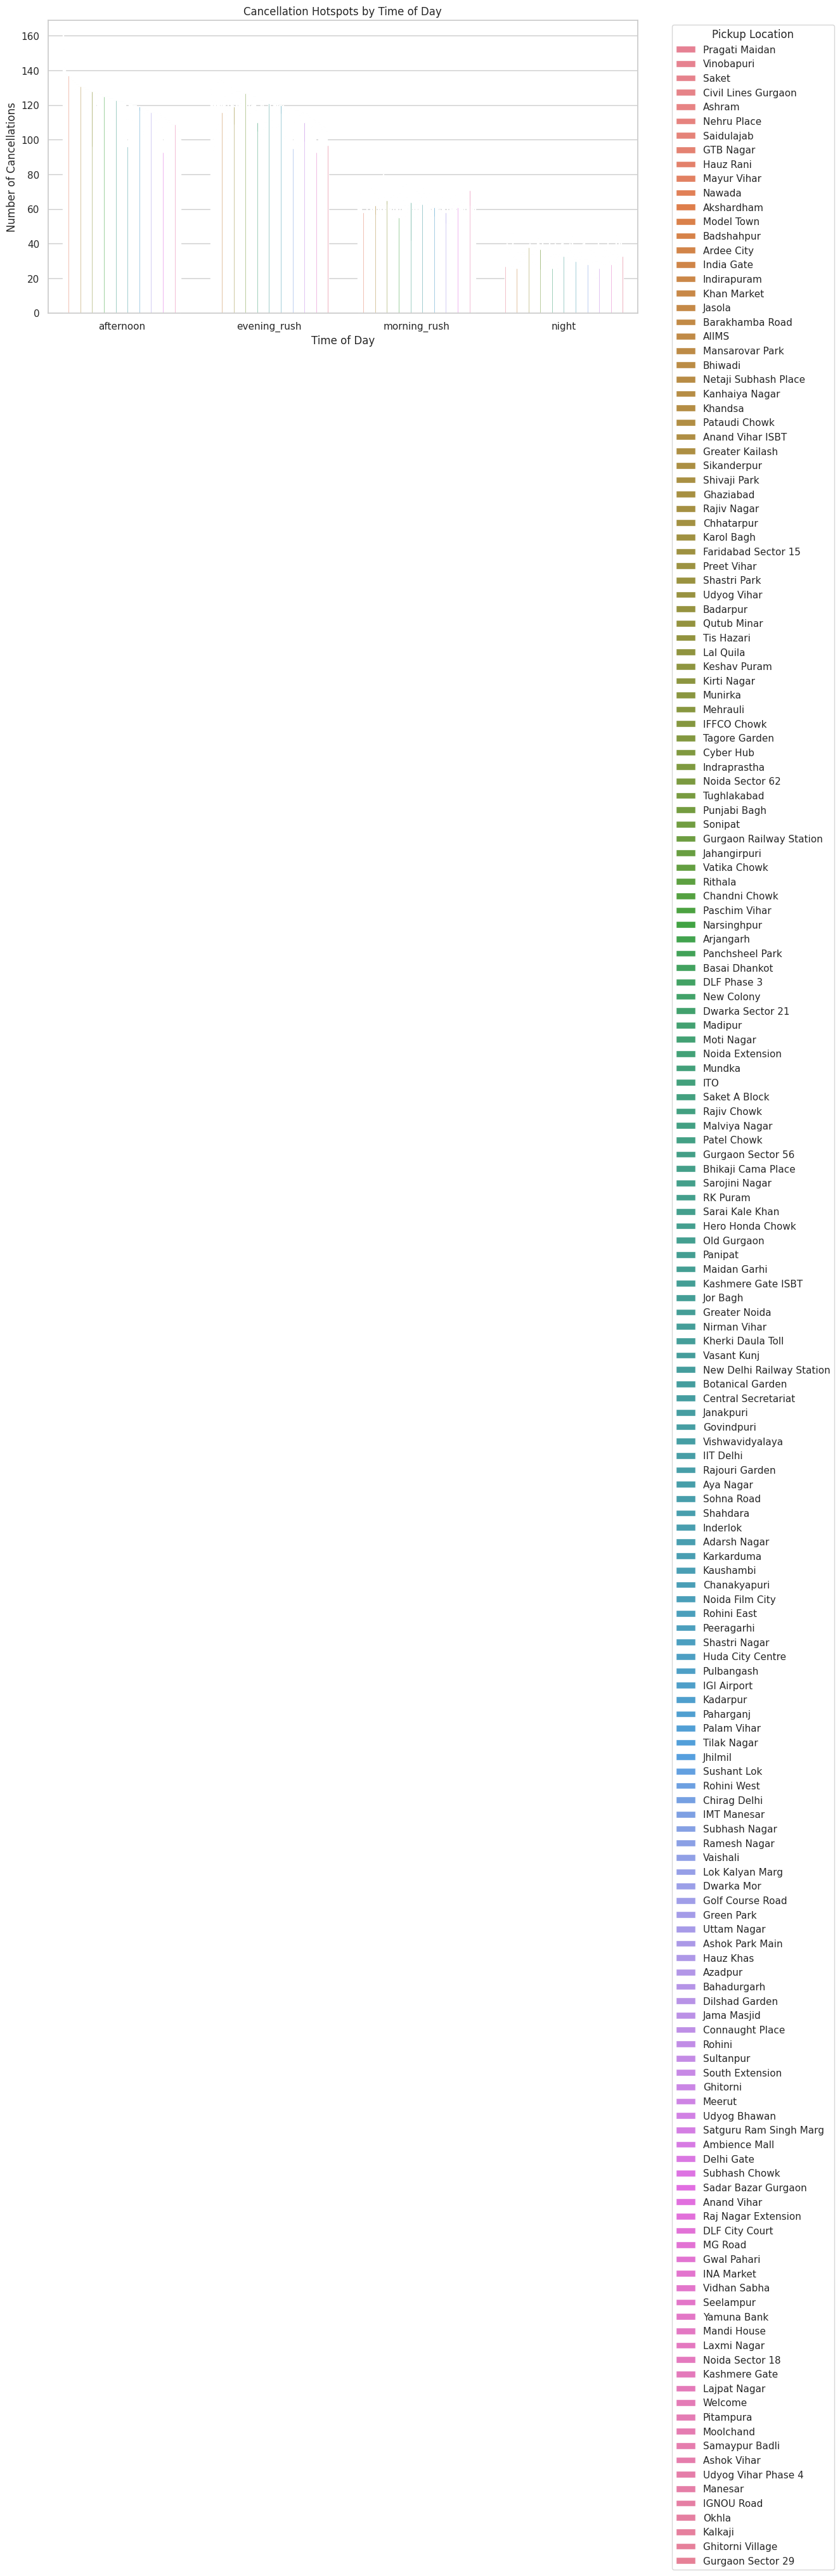

In [44]:
cancel_by_area_time = (
    df[df['booking_status'].str.lower() != 'completed']
    .groupby(['pickup_location', 'time_of_day']).size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print("\n--- Cancellation Hotspots by Area and Time ---")
print(cancel_by_area_time.head(10))

plt.figure(figsize=(12,6))
sns.barplot(data=cancel_by_area_time, x='time_of_day', y='count', hue='pickup_location', dodge=True)
plt.title('Cancellation Hotspots by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Cancellations')
plt.legend(title='Pickup Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()